# 📊 NIFTY 500 Stock Analysis

## 🚀 Project Overview

This project focuses on performing a comprehensive analysis of the NIFTY 500 stocks dataset. The aim is to process raw stock market data, engineer insightful features, and perform in-depth exploratory data analysis (EDA) to identify trends, patterns, and relationships in the Indian equity market.

The project showcases strong skills in data cleaning, feature engineering, visualization, and financial data interpretation using Python libraries like Pandas, Matplotlib, and Seaborn.

This analysis is highly relevant for:
✅ Financial analysts
✅ Data scientists interested in stock market data
✅ Portfolio managers seeking insights into market trends



## 🎯 Objectives of the Project

🧹 Data Preprocessing: Clean and prepare stock market data for analysis by handling missing values and ensuring proper data types.

⚡ Feature Engineering: Create new features such as Price Range, Volatility, and Average Price to derive deeper insights.

📊 Exploratory Data Analysis (EDA): Visualize key aspects like market capitalization, price movements, and industry-level trends.

📈 Insight Extraction: Highlight top-performing stocks, most volatile stocks, and sector-based performance to guide investment decisions.



## 📊 About the Dataset

📌 Source: Kaggle – NIFTY 500 Stocks Dataset

Description: Contains data for over 500 Indian companies listed on the NIFTY 500 index.

Key Features:

Company details: Company Name, Symbol, Industry

Stock prices: Open, High, Low, Previous Close, Last Traded Price

Price changes: Change, Percentage Change, 30 Day % Change, 365 Day % Change

Trading activity: Share Volume, Value (Indian Rupee)

52-week range: 52 Week High, 52 Week Low

File Format: CSV

Scope: Represents a diverse range of industries including Finance, IT, Healthcare, Energy, and Consumer Goods.

## 📌 Step 1: Load the Dataset

In [18]:
# 1️⃣ Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# 2️⃣ Load Dataset
df = pd.read_csv('nifty500_all.csv')  # adjust filename
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

### 📌 Observation
The dataset contains columns such as `Open`, `High`, `Low`, `Previous Close`, `Last Traded Price`, `Percentage Change`, `Share Volume`, `Value (Indian Rupee)`, `52 Week High`, `52 Week Low`, `365 Day Percentage Change`, `30 Day Percentage Change`.  
We will use these for our analysis.


## 📌 Step 2: Data Preprocessing

In [23]:
# 3️⃣ Data Preprocessing

# Convert numeric columns (in case they are strings)
numeric_cols = ['Open', 'High', 'Low', 'Previous Close', 'Last Traded Price', 
                'Change', 'Percentage Change', 'Share Volume', 
                'Value (Indian Rupee)' ,'52 Week High', '52 Week Low',
                '365 Day Percentage Change', '30 Day Percentage Change']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check missing values
print(df.isnull().sum())

# Drop rows with too many missing values
df.dropna(subset=['Open', 'High', 'Low', 'Last Traded Price'], inplace=True)

df.describe()


Company Name                  0
Symbol                        0
Industry                      0
Series                        0
Open                          0
High                          0
Low                           0
Previous Close                0
Last Traded Price             0
Change                        5
Percentage Change             3
Share Volume                  0
Value (Indian Rupee)          0
52 Week High                  0
52 Week Low                   0
365 Day Percentage Change    44
30 Day Percentage Change      3
dtype: int64


,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
count,501.000000,501.000000,501.000000,501.000000,501.000000,496.000000,498.000000,5.010000e+02,5.010000e+02,501.000000,501.000000,457.000000,498.000000
mean,1525.904491,1553.804990,1504.042415,1528.061277,1536.925449,4.592238,0.387169,2.580350e+06,8.635146e+08,2182.632196,1281.628982,-6.624048,-6.698373
std,4466.627117,4576.377692,4435.492332,4477.209376,4532.004734,53.445043,2.145733,9.407021e+06,4.335973e+09,5728.930152,3850.529646,33.439488,8.867154
min,6.750000,6.950000,6.700000,6.850000,6.800000,-543.650000,-14.830000,1.507000e+03,2.587223e+06,13.100000,4.550000,-91.140000,-52.720000
25%,215.300000,221.550000,210.600000,217.200000,214.650000,-4.225000,-0.812500,7.740500e+04,4.502265e+07,328.700000,166.800000,-27.220000,-11.187500
50%,551.100000,569.100000,547.000000,554.750000,563.000000,0.750000,0.455000,3.296100e+05,1.533133e+08,818.000000,438.050000,-11.060000,-6.010000
75%,1404.500000,1421.250000,1396.850000,1411.700000,1410.000000,8.850000,1.720000,1.235612e+06,6.644570e+08,2096.750000,1128.800000,10.750000,-1.502500
max,70300.000000,72500.000000,70300.000000,70800.900000,71900.000000,439.400000,6.500000,1.257883e+08,9.211987e+10,87550.000000,63000.000000,138.900000,20.850000


### 📌 Observation
We converted relevant columns to numeric format and removed rows with missing values in critical columns like `Open`, `High`, `Low`, and `Last Traded Price`.


## 📌 Step 3: Feature Engineering

In [24]:
# 🔥 Step 4: Feature Engineering

# 📈 Price Range (High - Low)
df['Price Range'] = df['High'] - df['Low']

# 📊 Price Range %
df['Price Range %'] = (df['Price Range'] / df['Open']) * 100

# 📌 Average Price
df['Average Price'] = (df['Open'] + df['High'] + df['Low'] + df['Last Traded Price']) / 4

# ⚡ Volatility Proxy
df['Volatility'] = df['Price Range %']

# 🏆 Rank by 30 Day Percentage Change
df['Rank 30D Change'] = df['30 Day Percentage Change'].rank(ascending=False)


### 📌 Engineered Features
1. **Price Range** = High - Low  
2. **Price Range %** = (Price Range / Open) × 100  
3. **Average Price** = Mean of Open, High, Low, Last Traded Price  
4. **Volatility** = Price Range % as a proxy  
5. **Rank 30D Change** = Rank stocks by 30-day percentage gain


## 📌 Step 4: Exploratory Data Analysis (EDA)

### 1️⃣ Top 10 Companies by Market Value

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_3800\741574963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company Name', y='Value (Indian Rupee)', data=top_value, palette='Blues_r')


<Figure size 1000x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

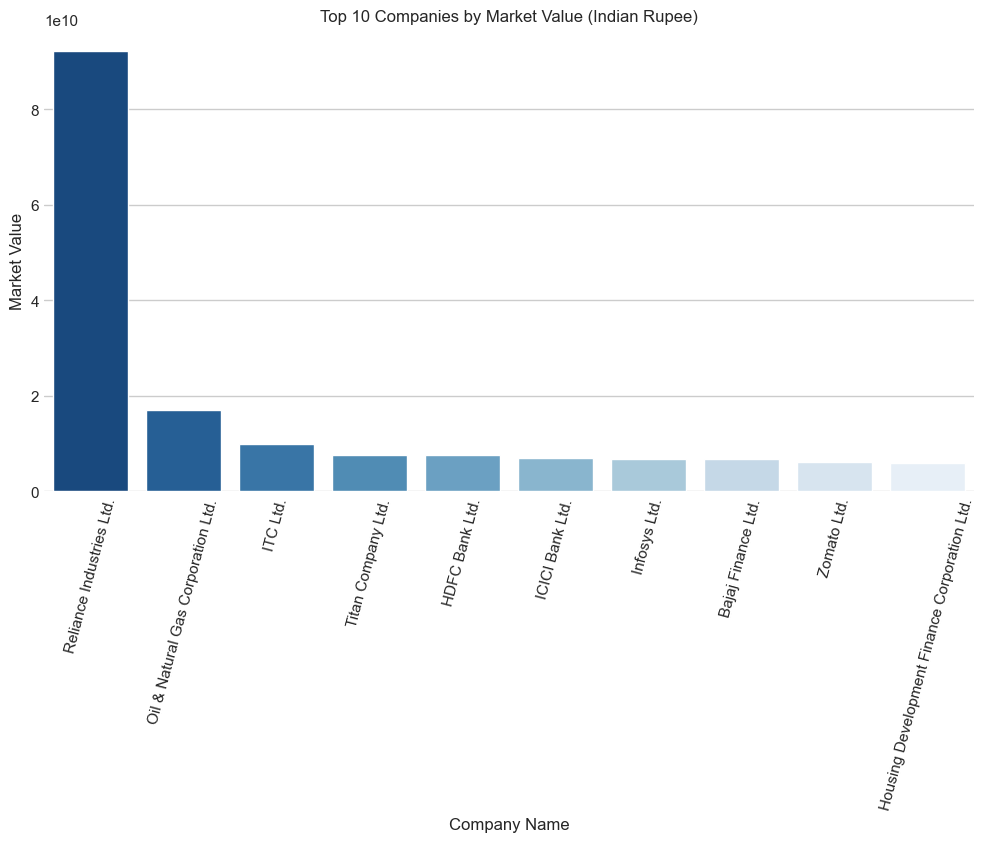

In [27]:
top_value = df.nlargest(10, 'Value (Indian Rupee)')
plt.figure(figsize=(12,6))
sns.barplot(x='Company Name', y='Value (Indian Rupee)', data=top_value, palette='Blues_r')
plt.xticks(rotation=75)
plt.title('Top 10 Companies by Market Value (Indian Rupee)')
plt.xlabel('Company Name')
plt.ylabel('Market Value')
plt.show()


#### 📊 Top 10 Companies by Market Value
This chart highlights the companies with the highest market capitalization in the NIFTY 500 dataset.


### 2️⃣ Distribution of Daily Percentage Change

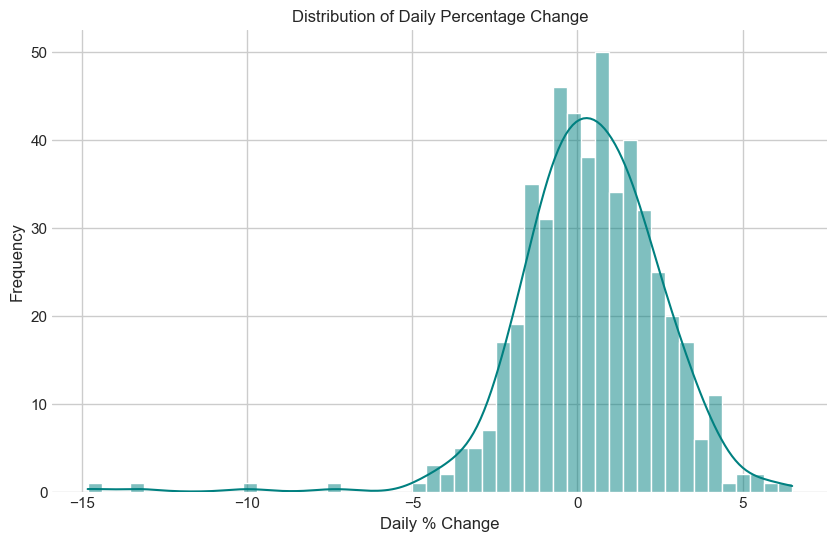

In [28]:
# 📈 Distribution of daily % change
plt.figure(figsize=(10,6))
sns.histplot(df['Percentage Change'], bins=50, kde=True, color='teal')
plt.title('Distribution of Daily Percentage Change')
plt.xlabel('Daily % Change')
plt.ylabel('Frequency')
plt.show()


#### 📊 Distribution of Daily Percentage Change
Shows how stock prices fluctuate daily. The histogram helps identify outliers and skewness.


### 3️⃣ Industry-wise Average Last Traded Price

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_3800\1008286683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_avg.index, y=industry_avg.values, palette='viridis')


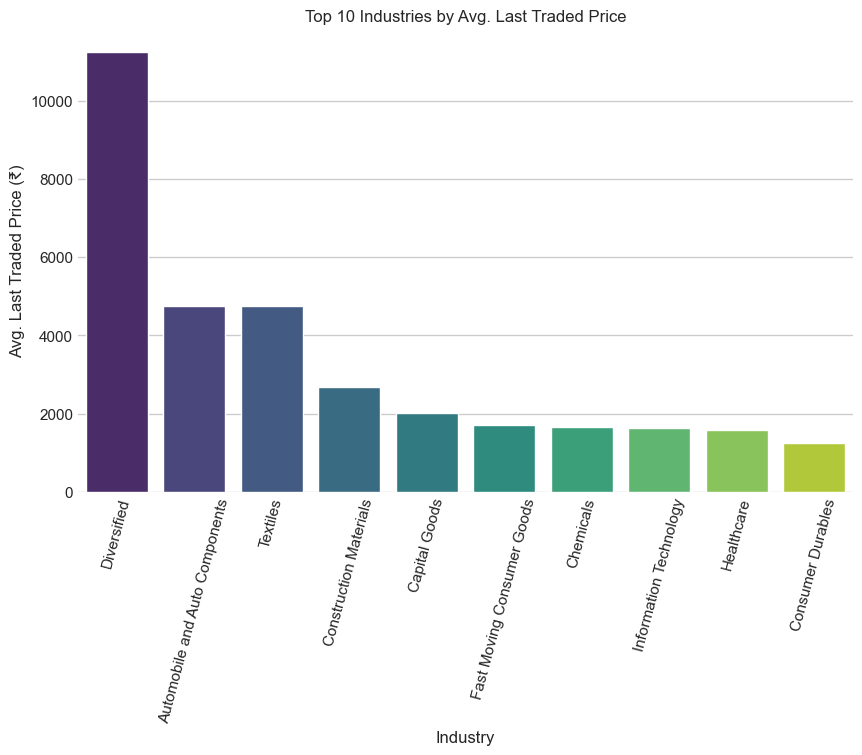

In [29]:
# 🏭 Average Last Traded Price by Industry
industry_avg = df.groupby('Industry')['Last Traded Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=industry_avg.index, y=industry_avg.values, palette='viridis')
plt.xticks(rotation=75)
plt.title('Top 10 Industries by Avg. Last Traded Price')
plt.xlabel('Industry')
plt.ylabel('Avg. Last Traded Price (₹)')
plt.show()


#### 📊 Industry-wise Average Last Traded Price
Highlights industries where stocks have higher average prices, reflecting market positioning.


### 4️⃣ Boxplot of 52 Week High Prices by Industry

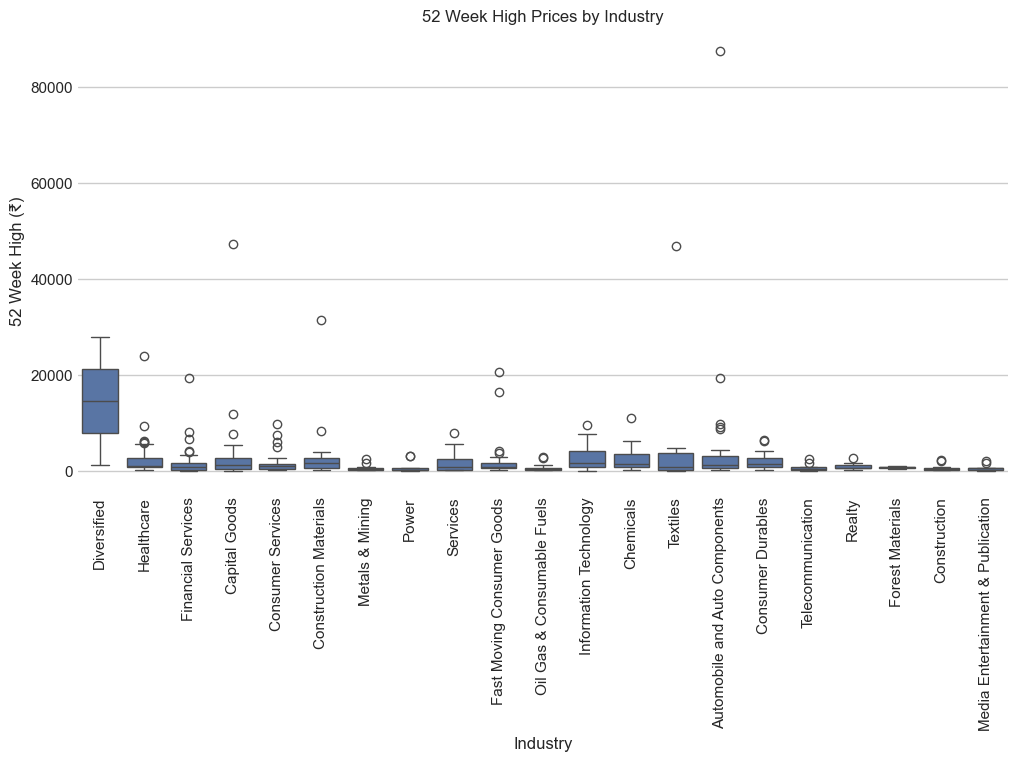

In [30]:
# 📦 Boxplot of 52 Week High by Industry
plt.figure(figsize=(12,6))
sns.boxplot(x='Industry', y='52 Week High', data=df)
plt.xticks(rotation=90)
plt.title('52 Week High Prices by Industry')
plt.xlabel('Industry')
plt.ylabel('52 Week High (₹)')
plt.show()


#### 📊 Boxplot of 52 Week High Prices by Industry
Shows the spread and outliers of annual high prices across industries.


### 5️⃣ Correlation Heatmap

<Figure size 1000x800 with 0 Axes>

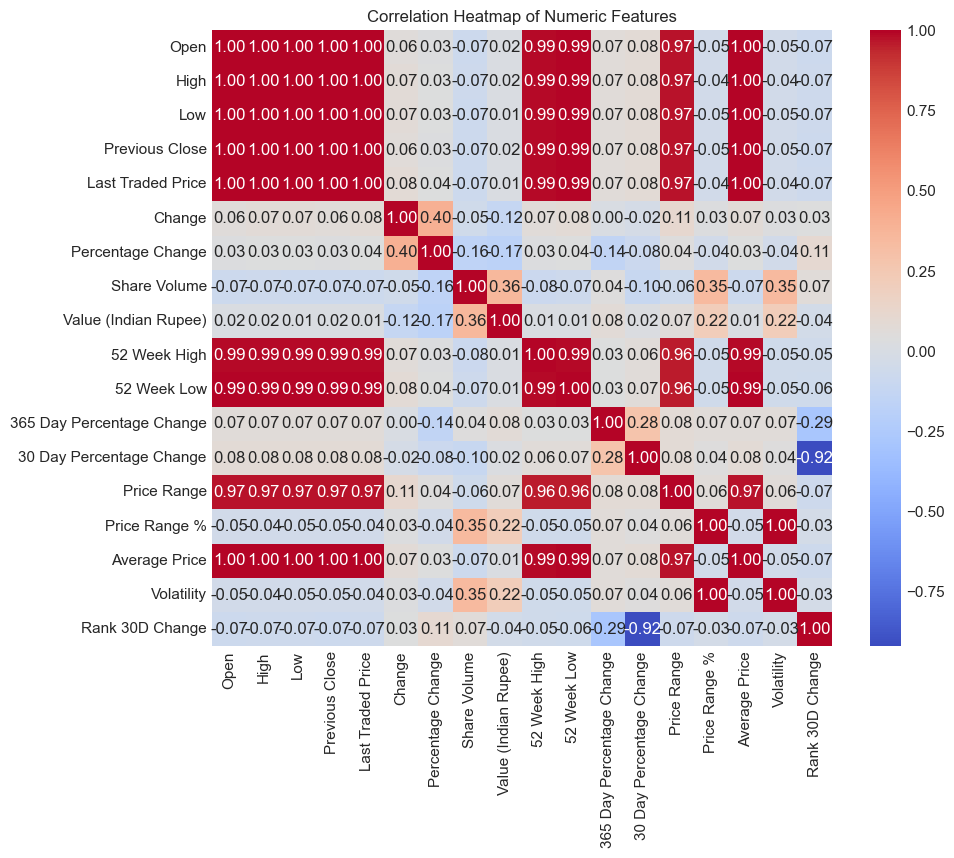

In [32]:
# 🔥 Correlation Heatmap
plt.figure(figsize=(10,8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


#### 📊 Correlation Heatmap
Visualizes relationships between numeric features like prices, percentage changes, and volumes.


### 6️⃣ Top 10 Most Volatile Stocks (by Price Range)


C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_3800\2886218661.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company Name', y='Price Range', data=top_vol, palette='magma')


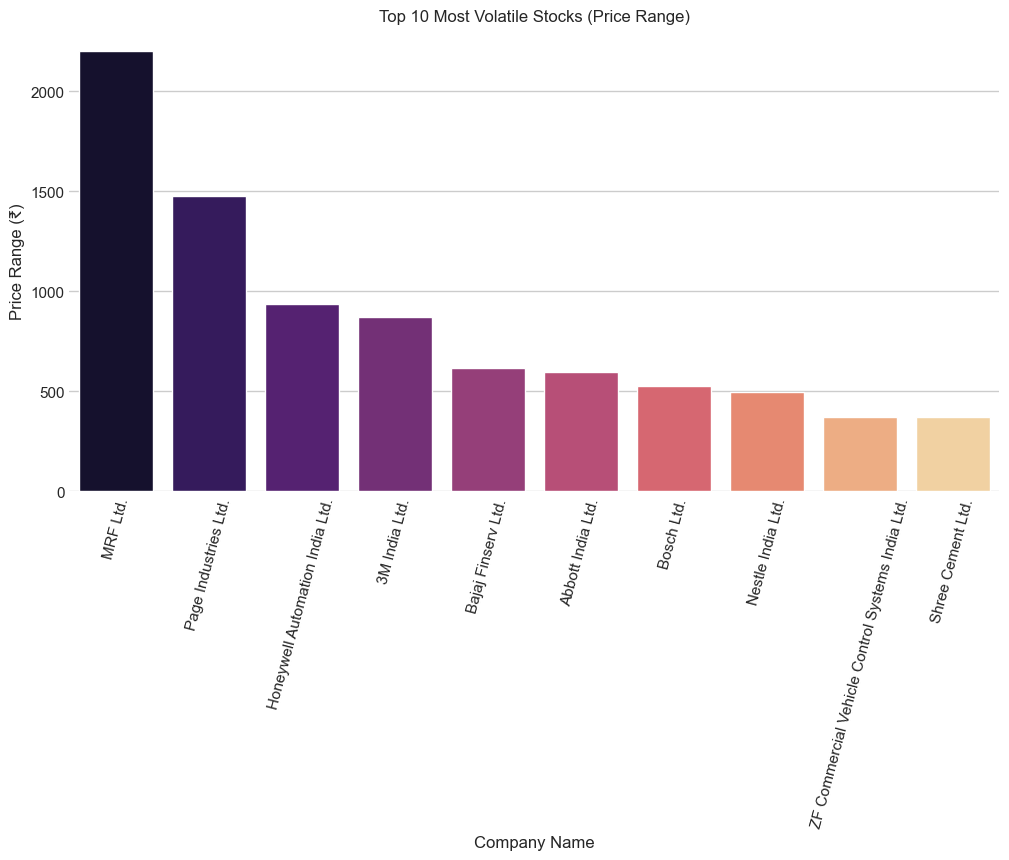

In [33]:
# ⚡ Price Range = High - Low
df['Price Range'] = df['High'] - df['Low']

# 🔝 Top 10 volatile stocks
top_vol = df.nlargest(10, 'Price Range')
plt.figure(figsize=(12,6))
sns.barplot(x='Company Name', y='Price Range', data=top_vol, palette='magma')
plt.xticks(rotation=75)
plt.title('Top 10 Most Volatile Stocks (Price Range)')
plt.xlabel('Company Name')
plt.ylabel('Price Range (₹)')
plt.show()


#### 📊 Top 10 Most Volatile Stocks
Shows companies with the largest difference between high and low prices—useful for risk assessment.


### 7️⃣ Share Volume vs. Last Traded Price (Log Scale)


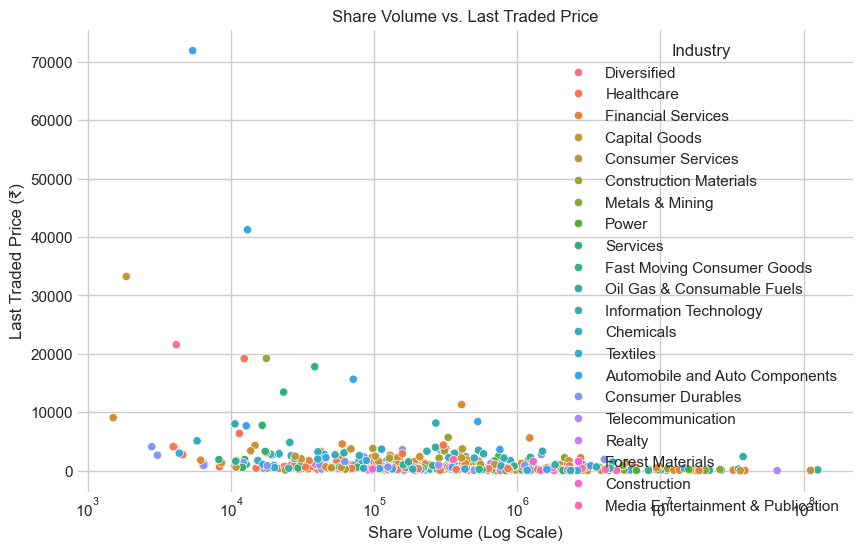

In [34]:
# 📈 Volume vs Price (Log Scale)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Share Volume', y='Last Traded Price', hue='Industry', data=df)
plt.xscale('log')
plt.title('Share Volume vs. Last Traded Price')
plt.xlabel('Share Volume (Log Scale)')
plt.ylabel('Last Traded Price (₹)')
plt.show()


#### 📊 Share Volume vs. Last Traded Price
This scatterplot shows how trading activity correlates with price levels across industries.


### 8️⃣ 30 Day vs. 365 Day Percentage Change

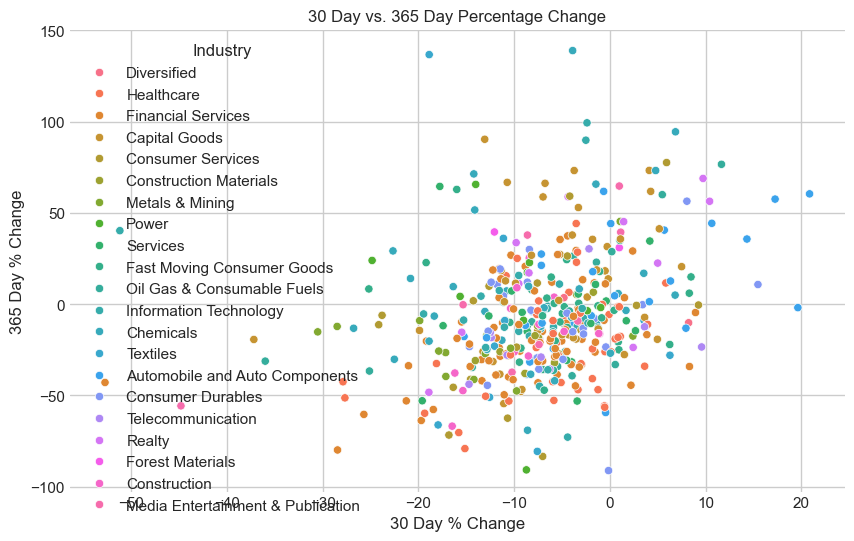

In [35]:
# 📈 Short-term vs Long-term change
plt.figure(figsize=(10,6))
sns.scatterplot(x='30 Day Percentage Change', y='365 Day Percentage Change', hue='Industry', data=df)
plt.title('30 Day vs. 365 Day Percentage Change')
plt.xlabel('30 Day % Change')
plt.ylabel('365 Day % Change')
plt.show()


#### 📊 30 Day vs. 365 Day Percentage Change
Compares short-term and long-term performance of stocks by industry.


### 9️⃣ Top 10 Stocks by 30 Day Percentage Change

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_3800\962387056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company Name', y='30 Day Percentage Change', data=top_30d, palette='cubehelix')


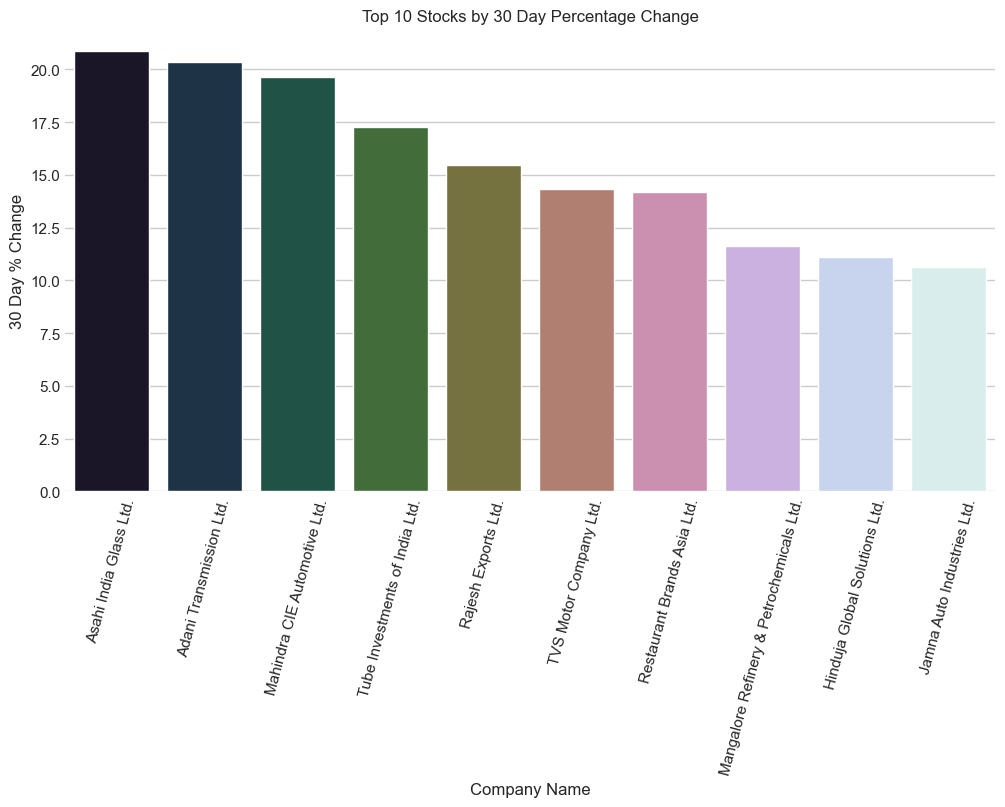

In [36]:
# 🔝 Top 10 gainers (30 days)
top_30d = df.nlargest(10, '30 Day Percentage Change')
plt.figure(figsize=(12,6))
sns.barplot(x='Company Name', y='30 Day Percentage Change', data=top_30d, palette='cubehelix')
plt.xticks(rotation=75)
plt.title('Top 10 Stocks by 30 Day Percentage Change')
plt.xlabel('Company Name')
plt.ylabel('30 Day % Change')
plt.show()


#### 📊 Top 10 Stocks by 30 Day Percentage Change
Identifies recent outperformers in the NIFTY 500.


### 🔟 Average Share Volume by Industry

C:\Users\SHREYA DAS\AppData\Local\Temp\ipykernel_3800\3588178140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_vol.index, y=industry_vol.values, palette='crest')


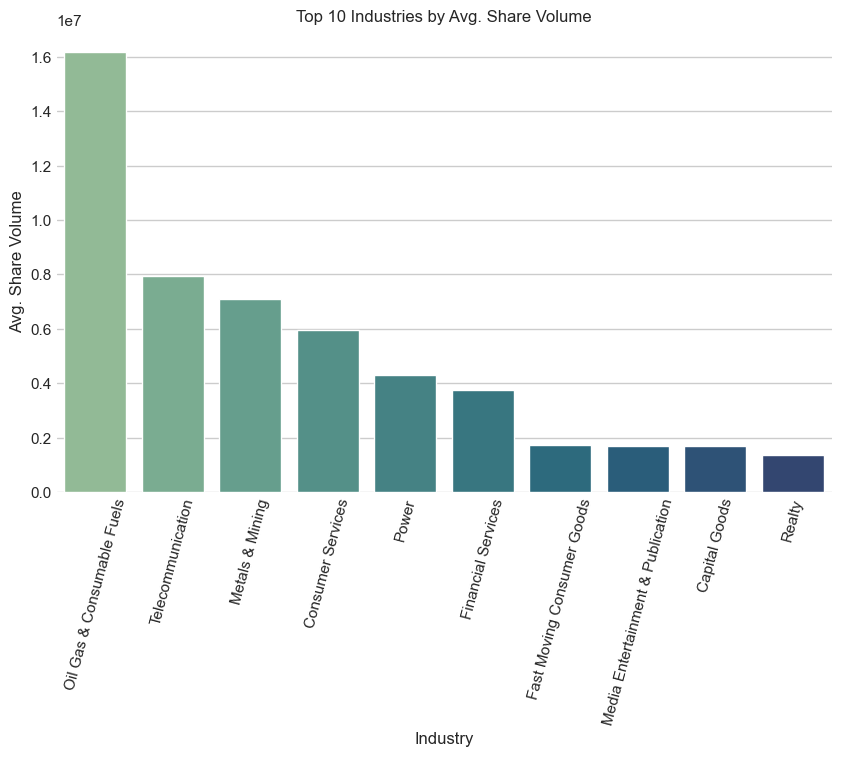

In [37]:
# 📦 Avg Share Volume by Industry
industry_vol = df.groupby('Industry')['Share Volume'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=industry_vol.index, y=industry_vol.values, palette='crest')
plt.xticks(rotation=75)
plt.title('Top 10 Industries by Avg. Share Volume')
plt.xlabel('Industry')
plt.ylabel('Avg. Share Volume')
plt.show()


#### 📊 Average Share Volume by Industry
Highlights industries with the highest trading activity.


## ✅ Key Insights & Conclusion
 Key Insights & Conclusion
🏆 Top Performers: Certain companies consistently outperformed others based on market value and price growth.

🔥 Volatility: Identified stocks with high daily price swings as potential high-risk, high-reward candidates.

📊 Industry Trends: Finance and IT sectors dominated in both market value and trading activity.

🔗 Feature Correlations: Strong correlation between previous close and last traded price; share volume showed weaker correlation with price.

📌 Actionable Insights: This analysis helps investors focus on high-performing industries, understand market volatility, and monitor short-term gainers for trading strategies.



## 🛠 Tools & Technologies Used

🐍 Python

📦 Libraries: Pandas, Matplotlib, Seaborn

📊 Jupyter Notebook